In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## **Série de Fourier**  

$f(t)=t^2$ para $0<t<2\pi$, repetindo-se com período $2\pi$ \\
$ F(t,N)=a_0+\sum_{n=1}^{N}[a_n\cdot cos(\frac{n\pi t}{L})+b_n\cdot sen(\frac{n\pi t}{L})]$ \\

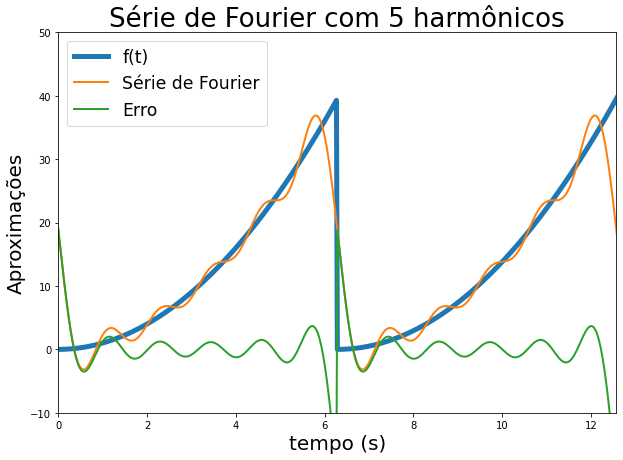

In [134]:
t = np.linspace(0,20,1000)
N = 5 #número de componentes

#gerando a descontinuidade da função f(t)
per= np.piecewise(t, [t <= 2*np.pi, t > 2*np.pi], [lambda t: t**2, lambda t: (t-2*np.pi)**2])

plt.figure(figsize=(10,7))
plt.plot(t, per, label='f(t)',linewidth=5) #plot da função alvo f(t)

x=np.zeros_like(t)

for n in range(1,N+1): 
  #Série de Fourier
  a_n = (4/n**2) #termo a_n
  b_n = -(4*np.pi/n) #termo b_n
  s= a_n*np.cos(n*t)+ b_n*np.sin(n*t) #somatório de a_n e b_n

  #plt.plot(t, s) #figura com a soma dos harmônicos
  x += s 

x += (4*(np.pi)**2)/3 #termo a0
plt.plot(t, x, label='Série de Fourier',linewidth=2) #plot da série
plt.plot(t, x-per, label='Erro',linewidth=2) #plot do Erro

#detalhes do gráfico
plt.xlim(right=4*np.pi, left=0)
plt.ylim(top=50, bottom=-10)
plt.legend(fontsize='xx-large')
plt.xlabel('tempo (s)', fontsize=20)
plt.ylabel('Aproximações',fontsize=20)
#plt.savefig('harmonicos.png') #figura com a soma dos harmônicos
plt.savefig('fourier'+str(N)+'.png') #figuras com N harmônicos
plt.title('Série de Fourier com '+str(N)+' harmônicos', fontsize=26)
plt.show()

## **Série de Taylor** 
$f(t)=t^2$ para $0<t<2\pi$, repetindo-se com período $2\pi$ \\
$L(t, N)=\sum_{n=0}^{N}\frac{F^{(n)}(t_0)}{n!} (t-t_0)^n$ \\

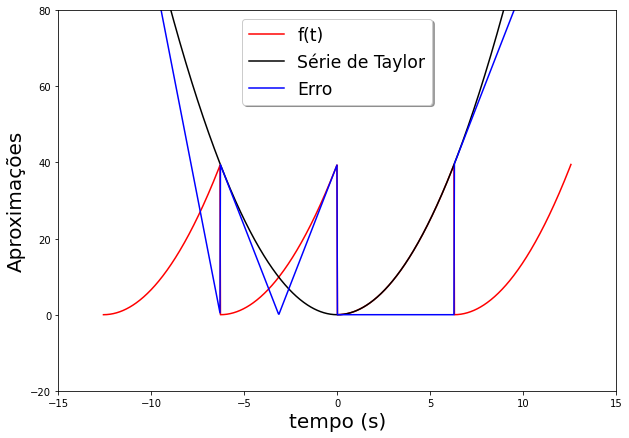

In [139]:
t = np.linspace(-4*np.pi,4*np.pi,1000)
t0 = 0 #ponto ao redor do qual a série será calculada

#gerando a descontinuidade da função f(t)
per= np.piecewise(t, [t <= -2*np.pi, (t > -2*np.pi) & (t<0), (t>0) & (t <= 2*np.pi),  t > 2*np.pi], [lambda t: (t+4*np.pi)**2, lambda t: (t+2*np.pi)**2,lambda t: t**2, lambda t: (t-2*np.pi)**2])

#aproximação por série de Taylor
f=t0**2  + 2*t0*(t-t0) + (t-t0)**2

plt.figure(figsize=(10,7))
plt.plot(t, per, label='f(t)',linewidth=1.5, color='red') #plot da função alvo f(t)

plt.plot(t,f, label='Série de Taylor',linewidth=1.5, color='black') #plot da serie

plt.plot(t, abs(f-per), label='Erro',linewidth=1.5, color='blue') #plot do Erro

#detalhes do gráfico
plt.xlim(right=15, left=-15)
plt.ylim(top=80, bottom=-20)
plt.legend(loc='upper center', shadow=True, fontsize='xx-large')
plt.xlabel('tempo (s)', fontsize=20)
plt.ylabel('Aproximações',fontsize=20)
plt.savefig('taylor'+str(t0)+'.png')
plt.show()

## **Série de Taylor da Série de Fourier**
**Variando t_0:**

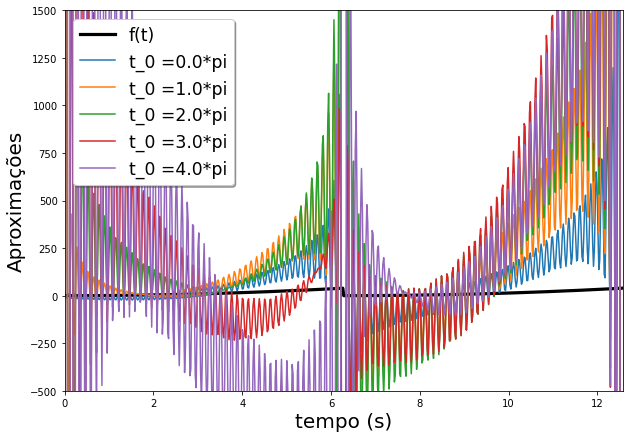

In [148]:
t = np.linspace(0,20,1000)
M = 50 #número de componentes de Fourier
N = 1 #número de componentes de Taylor

# criando a função fatorial, que usaremos na série de Taylor
from numpy import prod
def fatorial(n):
  fat=1
  for i in range(1,n+1):
    fat=fat*i
  return fat

#gerando a descontinuidade da função f(t)
per= np.piecewise(t, [t <= 2*np.pi, t > 2*np.pi], [lambda t: t**2, lambda t: (t-2*np.pi)**2])

plt.figure(figsize=(10,7))
plt.plot(t, per, label='f(t)',linewidth=3.2, color='black') #plot da função alvo f(t)

x=np.zeros_like(t)
y=0

for t_0 in range(0,5): #variando t_0
  t_0 = np.pi*t_0
  for n in range(0,N+1): #somatório em N (série de Taylor)
    for m in range(1,M+1): #somatório em M (série de Fourier)
      #Série de Fourier
      a_m = (4*m**(n-2)) #termo a_m
      b_m = -(4*np.pi*m**(n-1)) #termo b_m
      s= a_m*np.sin(m*t+(n+1)*np.pi/2)+ b_m*np.sin(m*t+n*np.pi/2) #somatório de a_n e b_n
      x= x + s
    tay=x*((t-t_0)**n)/fatorial(n)
    y = y + tay
  y += (4*(np.pi)**2)/3 #termo a0
  plt.plot(t, y, label='t_0 ='+str(t_0/np.pi)+'*pi')

#detalhes do gráfico
plt.xlim(right=4*np.pi, left=0)
plt.ylim(top=1500, bottom=-500)
plt.legend(loc='upper left', shadow=True, fontsize='xx-large')
plt.xlabel('tempo (s)', fontsize=20)
plt.ylabel('Aproximações',fontsize=20)
plt.savefig('variando_t0.png')
plt.show()

**Variando N:**

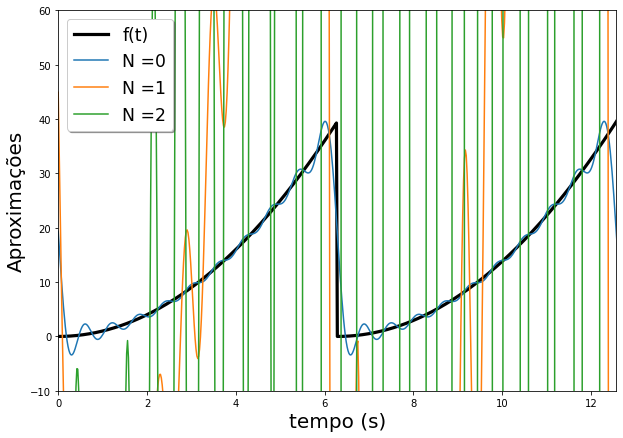

In [142]:
t = np.linspace(0,20,1000)
M = 10 #número de componentes de Fourier
t_0 = 0 #ponto ao redor do qual a série de Taylor será calculada

# criando a função fatorial, que usaremos na série de Taylor
from numpy import prod
def fatorial(n):
  fat=1
  for i in range(1,n+1):
    fat=fat*i
  return fat

#gerando a descontinuidade da função f(t)
per= np.piecewise(t, [t <= 2*np.pi, t > 2*np.pi], [lambda t: t**2, lambda t: (t-2*np.pi)**2])

plt.figure(figsize=(10,7))
plt.plot(t, per, label='f(t)',linewidth=3.2, color='black') #plot da função alvo f(t)

x=np.zeros_like(t)
y=0

for N in range(0,3): #variando N
  for n in range(0,N+1): #somatório em N (série de Taylor)
    for m in range(1,M+1): #somatório em M (série de Fourier)
      #Série de Fourier
      a_m = (4*m**(n-2)) #termo a_m
      b_m = -(4*np.pi*m**(n-1)) #termo b_m
      s= a_m*np.sin(m*t+(n+1)*np.pi/2)+ b_m*np.sin(m*t+n*np.pi/2) #somatório de a_n e b_n
      x+= s
    tay=x*((t-t_0)**n)/fatorial(n)
    y = y + tay
  y += (4*(np.pi)**2)/3 #termo a0
  plt.plot(t, y, label='N ='+str(N))

#detalhes do gráfico
plt.xlim(right=4*np.pi, left=0)
plt.ylim(top=60, bottom=-10)
plt.legend(loc='upper left', shadow=True, fontsize='xx-large')
plt.xlabel('tempo (s)', fontsize=20)
plt.ylabel('Aproximações',fontsize=20)
plt.savefig('variando_N.png')
plt.show()

**Variando M:**

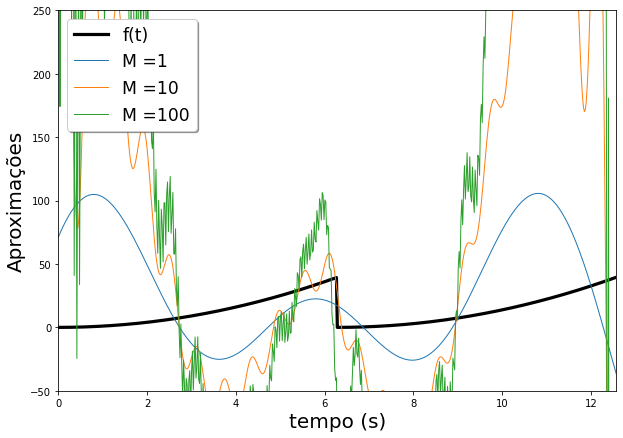

In [146]:
t = np.linspace(0,20,1000)
N = 1 #número de componentes de Taylor
t_0 = 2*np.pi #ponto ao redor do qual a série de Taylor será calculada

# criando a função fatorial, que usaremos na série de Taylor
from numpy import prod
def fatorial(n):
  fat=1
  for i in range(1,n+1):
    fat=fat*i
  return fat

#gerando a descontinuidade da função f(t)
per= np.piecewise(t, [t <= 2*np.pi, t > 2*np.pi], [lambda t: t**2, lambda t: (t-2*np.pi)**2])

plt.figure(figsize=(10,7))
plt.plot(t, per, label='f(t)',linewidth=3.2, color='black') #plot da função alvo f(t)

x=np.zeros_like(t)
y=0

for M in range(0,3): #variando M
  M = 10**M
  for n in range(0,N+1): #somatório em N (série de Taylor)
    for m in range(1,M+1): #somatório em M (série de Fourier)
      #Série de Fourier
      a_m = (4*m**(n-2)) #termo a_m
      b_m = -(4*np.pi*m**(n-1)) #termo b_m
      s= a_m*np.sin(m*t+(n+1)*np.pi/2)+ b_m*np.sin(m*t+n*np.pi/2) #somatório de a_n e b_n
      x= x+s
    tay=x*((t-t_0)**n)/fatorial(n)
    y = y + tay
  y += (4*(np.pi)**2)/3 #termo a0
  plt.plot(t, y, label='M ='+str(M),linewidth=1)

#detalhes do gráfico
plt.xlim(right=4*np.pi, left=0)
plt.ylim(top=250, bottom=-50)
plt.legend(loc='upper left', shadow=True, fontsize='xx-large')
plt.xlabel('tempo (s)', fontsize=20)
plt.ylabel('Aproximações',fontsize=20)
plt.savefig('variando_M.png')
plt.show()

**Valores ótimos**

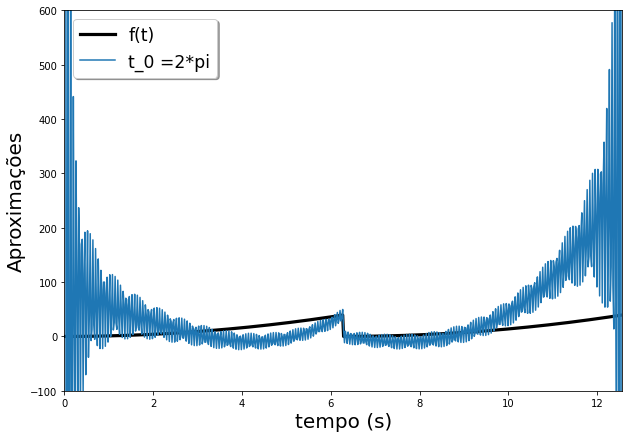

In [147]:
t = np.linspace(0,20,1000)
M = 100 #número de componentes de Fourier
N = 1 #número de componentes de Taylor
t_0 = 2*np.pi #ponto ao redor do qual a série de Taylor é calculada

# criando a função fatorial, que usaremos na série de Taylor
from numpy import prod
def fatorial(n):
  fat=1
  for i in range(1,n+1):
    fat=fat*i
  return fat

#gerando a descontinuidade da função f(t)
per= np.piecewise(t, [t <= 2*np.pi, t > 2*np.pi], [lambda t: t**2, lambda t: (t-2*np.pi)**2])

plt.figure(figsize=(10,7))
plt.plot(t, per, label='f(t)',linewidth=3.2, color='black') #plot da função alvo f(t)

x=np.zeros_like(t)
y=0

for n in range(0,N+1): #somatório em N (série de Taylor)
  for m in range(1,M+1): #somatório em M (série de Fourier)
    #Série de Fourier
    a_m = (4*m**(n-2)) #termo a_m
    b_m = -(4*np.pi*m**(n-1)) #termo b_m
    s= a_m*np.sin(m*t+(n+1)*np.pi/2)+ b_m*np.sin(m*t+n*np.pi/2) #somatório de a_n e b_n
    x= x + s
  tay=x*((t-t_0)**n)/fatorial(n) #série de Taylor
  y = y + tay
y += (4*(np.pi)**2)/3 #termo a0
plt.plot(t, y, label='t_0 =2*pi')

#detalhes do gráfico
plt.xlim(right=4*np.pi, left=0)
plt.ylim(top=600, bottom=-100)
plt.legend(loc='upper left', shadow=True, fontsize='xx-large')
plt.xlabel('tempo (s)', fontsize=20)
plt.ylabel('Aproximações',fontsize=20)
plt.savefig('otimos.png')
plt.show()